# Scaling Exercises

In [1]:
import pandas as pd
import numpy as np
import wrangle
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.model_selection import train_test_split

Do your work for these exercises in a jupyter notebook named scaling. Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

In [2]:
# get the zillow dataset using the function in wrangle and assign it to a dataframe
df = wrangle.wrangle_zillow()

In [3]:
# make sure all required columns queried correctly
df.head()

,bedrooms,bathrooms,sqft,tax_value,year,tax_amount,fips
4,4,2.0,3633.0,296425.0,2005,6941.39,6037
18,3,1.0,1244.0,169471.0,1950,2532.88,6037
19,3,2.0,1300.0,233266.0,1950,3110.99,6037
20,3,2.0,1222.0,290492.0,1951,3870.25,6037
23,3,2.5,1821.0,537949.0,2013,6173.72,6059


Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution.

In [5]:
# split the data
train, validate, test = wrangle.split_data(df)

In [6]:
# assign dependent and independent variables for the train, validate, and test datasets

X_train = train[['bedrooms', 'bathrooms', 'sqft', 'year', 'tax_amount']]
y_train = train['tax_value']
X_validate = validate[['bedrooms', 'bathrooms', 'sqft', 'year', 'tax_amount']]
y_validate = validate['tax_value']
X_test = test[['bedrooms', 'bathrooms', 'sqft', 'year', 'tax_amount']]
y_test = test['tax_value']

Text(0.5, 1.0, 'Scaled')

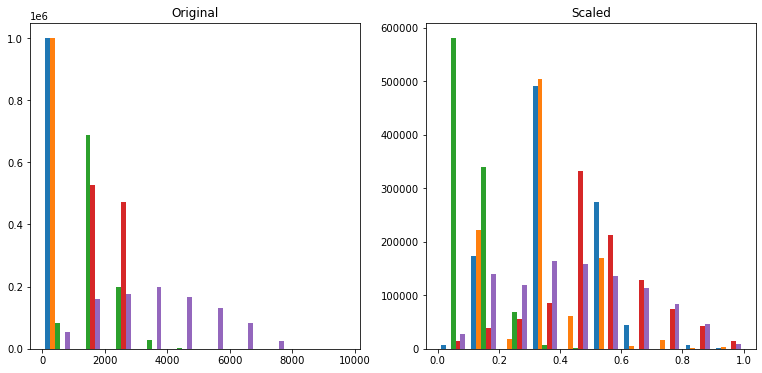

In [7]:
# assign the MinMaxScaler to a variable
scaler = sklearn.preprocessing.MinMaxScaler()
# fit the scaler to the train dataset
scaler.fit(X_train)

# transform the X_train data using the scaler and assign to a variable
X_train_scaled = scaler.transform(X_train)
# transform the X_validate data using the scaler and assign to a variable
X_validate_scaled = scaler.transform(X_validate)
# transform the X_test data using the scaler and assign to a variable
X_test_scaled = scaler.transform(X_test)

# plot the original X_train data
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train)
plt.title('Original')
# plot the scaled X_train data
plt.subplot(122)
plt.hist(X_train_scaled)
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

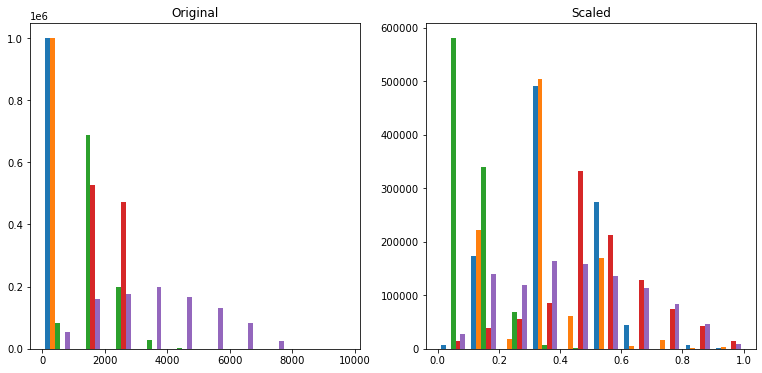

In [8]:
# assign the RobustScaler to a variable
scaler2 = sklearn.preprocessing.RobustScaler()
# Note that we only call .fit with the training data, but we use .transform to apply the scaling to all the data splits.
scaler2.fit(X_train)

# transform the X_train data and assign to a variable
X_train_robust = scaler.transform(X_train)
# transform the X_validate data and assign to a variable
X_validate_robust = scaler.transform(X_validate)
# transform the X_test data and assign to a variable
X_test_robust = scaler.transform(X_test)

# create a histogram of the original X_train data
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train)
plt.title('Original')
# create a histogram of the scaled X_train data
plt.subplot(122)
plt.hist(X_train_robust)
plt.title('Scaled')

Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

Text(0.5, 1.0, 'Scaled')

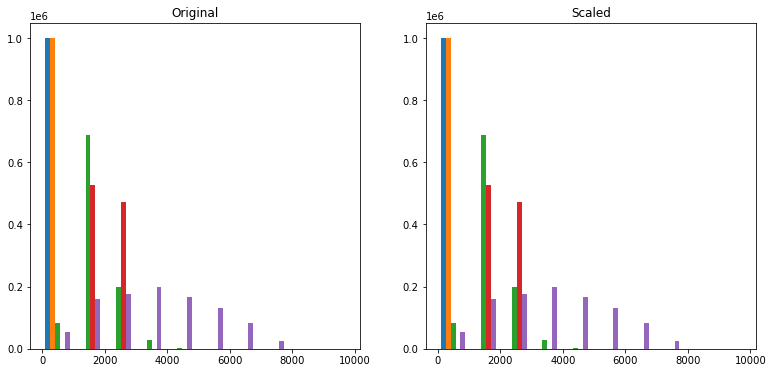

In [9]:
# use the inverse_transform method on the previously scaled train dataset and assign it to a new variable
train_scaled_inverse = scaler.inverse_transform(X_train_scaled)
# create a histplot of the original X_train data
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train)
plt.title('Original')
# create a histogram of the inverse of the scaled data
plt.subplot(122)
plt.hist(train_scaled_inverse)
plt.title('Scaled')
# the data looks identical

Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

(array([[6.58000e+03, 0.00000e+00, 0.00000e+00, 1.73363e+05, 4.91457e+05,
         2.75354e+05, 4.50220e+04, 6.47900e+03, 0.00000e+00, 1.03700e+03],
        [2.21942e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 5.22450e+05,
         6.07270e+04, 1.74056e+05, 2.00620e+04, 0.00000e+00, 5.50000e+01],
        [2.40000e+01, 9.56000e+02, 1.81190e+04, 1.30461e+05, 3.50769e+05,
         3.50918e+05, 1.29416e+05, 1.82080e+04, 4.19000e+02, 2.00000e+00],
        [3.69000e+02, 0.00000e+00, 1.91580e+04, 1.29055e+05, 3.55433e+05,
         3.41930e+05, 1.34024e+05, 1.83880e+04, 9.06000e+02, 2.90000e+01],
        [5.80000e+01, 6.86000e+02, 1.73380e+04, 1.29783e+05, 3.52536e+05,
         3.50060e+05, 1.30242e+05, 1.77760e+04, 7.98000e+02, 1.50000e+01]]),
 array([-5.19933758e+00, -4.15947007e+00, -3.11960255e+00, -2.07973503e+00,
        -1.03986752e+00,  4.89217555e-11,  1.03986752e+00,  2.07973503e+00,
         3.11960255e+00,  4.15947007e+00,  5.19933758e+00]),
 <a list of 5 BarContainer objects>)

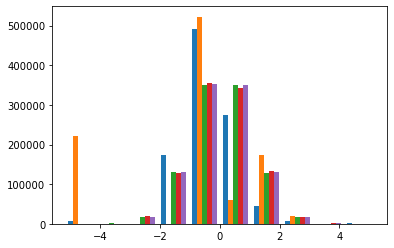

In [10]:
# assign the quantile transformer method with normal output distribution to a variable
train_scaled_quantile = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')
# fit and transform the X_train data using the quantile transformer and assign to a new variable
quantile = train_scaled_quantile.fit_transform(X_train)
# create a histogram of the scaled X_train data
plt.hist(quantile)

Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

(array([[179943.,      0.,      0.,      0., 491457.,      0.,      0.,
              0., 275354.,  52538.],
        [221942.,      0.,  18218.,      0., 504232.,      0.,      0.,
          60727., 169300.,  24873.],
        [ 99925., 100745., 100380.,  99644., 100519.,  99095., 100232.,
          98384., 100425.,  99943.],
        [ 97684.,  96448., 106045.,  87294., 116544., 100447.,  90064.,
         102860., 103178.,  98728.],
        [100413., 100224.,  99655., 101416.,  98816.,  99630.,  98033.,
          99590., 100546., 100969.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 5 BarContainer objects>)

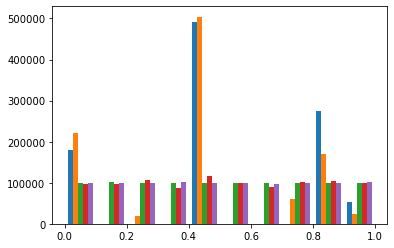

In [11]:
# # assign the quantile transformer method with uniform output distribution to a variable
train_scaled_quantile2 = sklearn.preprocessing.QuantileTransformer()
# fit and transform the X_train data using the quantile transformer and assign to a new variable
quantile2 = train_scaled_quantile2.fit_transform(X_train)
# create a histogram of the scaled X_train data
plt.hist(quantile2)

Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [17]:
# create a function to scale X_train, X_validate, and X_test data using MinMaxScaler()
def minmax_scaler():
    '''This function applies the .MinMaxScaler method from sklearn to previously assigned
    X_train, X_validate, and X_test variables and returns the scaled versions of each variable.'''
    # make the scaler
    scaler = sklearn.preprocessing.MinMaxScaler()
    # fit and transform the X_train data
    X_train_minmax = pd.DataFrame(scaler.fit_transform(X_train))
    # transform the X_validate data
    X_validate_minmax = pd.DataFrame(scaler.transform(X_validate))
    # transform the X_test data
    X_test_minmax = pd.DataFrame(scaler.transform(X_test))
    # return the scaled data for each renamed variable
    return X_train_minmax, X_validate_minmax, X_test_minmax

In [16]:
# create a function to scale X_train, X_validate, and X_test data using StandardScaler()
def standard_scaler():
    '''This function applies the .StandardScaler method from sklearn to previously assigned
    X_train, X_validate, and X_test variables and returns the scaled versions of each variable.'''
    # make the scaler
    scaler = sklearn.preprocessing.StandardScaler()
    # fit and transform the X_train data
    X_train_standard = pd.DataFrame(scaler.fit_transform(X_train))
    # transform the X_validate data
    X_validate_standard = pd.DataFrame(scaler.transform(X_validate))
    # transform the X_test data
    X_test_standard = pd.DataFrame(scaler.transform(X_test))
    # return the scaled data for each renamed variable
    return X_train_standard, X_validate_standard, X_test_standard

In [18]:
# create a function to scale X_train, X_validate, and X_test data using MinMaxScaler()
def robust_scaler():
    '''This function applies the .RobustScaler method from sklearn to previously assigned
    X_train, X_validate, and X_test variables and returns the scaled versions of each variable.'''
    # make the scaler
    scaler = sklearn.preprocessing.RobustScaler()
    # fit and transform the X_train data
    X_train_robust = pd.DataFrame(scaler.fit_transform(X_train))
    # transform the X_validate data
    X_validate_robust = pd.DataFrame(scaler.transform(X_validate))
    # transform the X_test data
    X_test_robust = pd.DataFrame(scaler.transform(X_test))
    # return the scaled data for each renamed variable
    return X_train_robust, X_validate_robust, X_test_robust

In [12]:
# create a function to scale X_train, X_validate, and X_test data using quantile transformer
def quantile_scaler_norm():
    '''This function applies the .QuantileTransformer method from sklearn to previously assigned
    X_train, X_validate, and X_test variables and returns the scaled versions of each variable.'''
    # make the scaler
    scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')
    # fit and transform the X_train variable
    X_train_quantile = pd.DataFrame(scaler.fit_transform(X_train))
    # transform the X_validate variable
    X_validate_quantile = pd.DataFrame(scaler.transform(X_validate))
    # transform the X_test variable
    X_test_quantile = pd.DataFrame(scaler.transform(X_test))
    # return three variables, one for each newly scaled variable
    return X_train_quantile, X_validate_quantile, X_test_quantile

In [13]:
x,y,z = quantile_scaler_norm()

In [14]:
x.shape, y.shape, z.shape

((999292, 5), (333098, 5), (333098, 5))

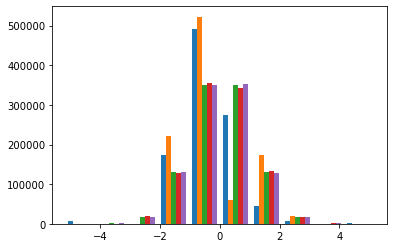

In [15]:
plt.hist(x)
plt.show()